In [29]:
data <- read.table("ID1_Chr.pangenome.gfa.ordered.tsv", header = FALSE, sep = "\t", fill = TRUE, comment.char = "", quote = "", skip=6)
data

V1,V2,V3,V4,V5,V6
<chr>,<int>,<dbl>,<dbl>,<dbl>,<chr>
ID7_Chr_fa_gz,800170661,800170661,731062402,800170661,Tropical
ID14_Chr_fa_gz,800170661,1358600576,1210102336,1358600576,Tropical
ID16_Chr_fa_gz,660634245,1788574995,1565268076,1788574995,Tropical
ID18_Chr_fa_gz,535986947,2145892444,1847835392,2145892444,Tropical
ID21_Chr_fa_gz,406702429,2412499051,2047708972,2412499051,Tropical
ID22_Chr_fa_gz,339214833,2693556036,2240250777,2693556036,Tropical
ID27_Chr_fa_gz,284260781,2911860110,2379019652,2911860110,Tropical
ID29_Chr_fa_gz,248104089,3146300111,2524112040,3146300111,Tropical
ID30_Chr_fa_gz,220425031,3345403915,2635623076,3345403915,Tropical


In [30]:
colnames(data) <- c("Sample", "Core", "CommonTop", "Unused", "RareTop", "Group")


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_col()`).”


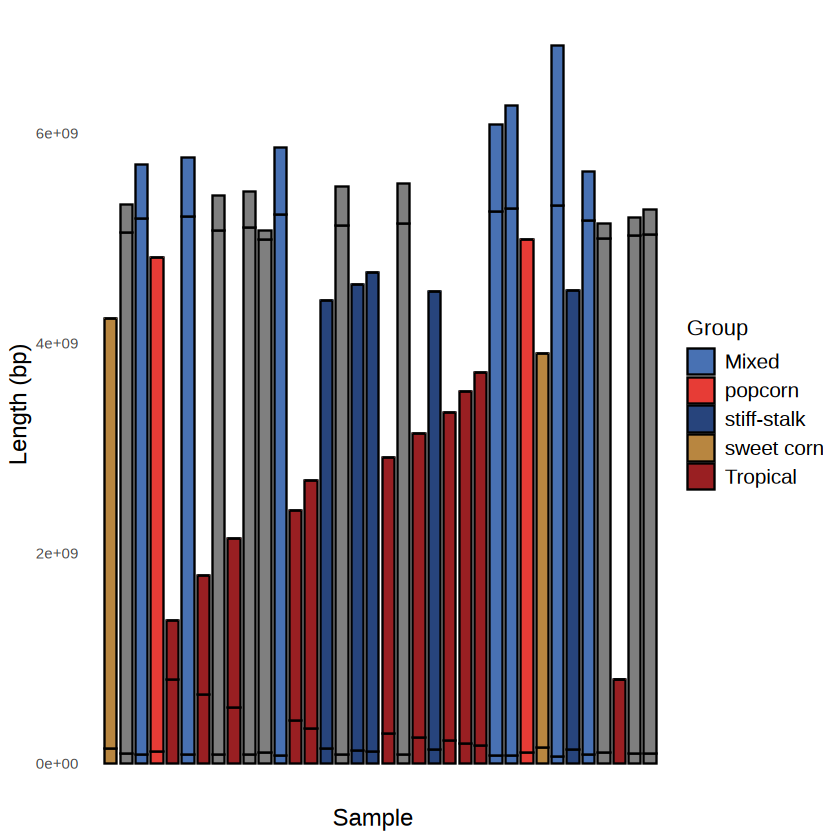

In [36]:
library(tidyverse)

data <- data %>%
  mutate(across(c(Core, CommonTop, RareTop), as.numeric))

# 计算每个 segment 的长度
long_data <- data %>%
  mutate(
    Core_length = Core,
    Common_length = CommonTop - Core,
    Rare_length = RareTop - CommonTop
  ) %>%
  select(Sample, Group, Core_length, Common_length, Rare_length) %>%
  pivot_longer(
    cols = c(Core_length, Common_length, Rare_length),
    names_to = "Type", values_to = "Length"
  )

# 设置群体配色
group_colors <- c(
  "Tropical" = "#991F22",
  "sweet corn" = "#B88640",
  "stiff-stalk" = "#27447C",
  "Non-Stiff Stalk" = "#168676",
  "popcorn" = "#E73C36",
  "Mixed" = "#4871B3"
)

# 设置变异类型层级顺序（可选）
long_data$Type <- factor(long_data$Type, levels = c("Rare_length", "Common_length", "Core_length"))

# 开始绘图
ggplot(long_data, aes(x = Sample, y = Length, fill = Group)) +
  geom_col(position = "stack", width = 0.8, color = "black") +
  scale_fill_manual(values = group_colors) +
  labs(x = "Sample", y = "Length (bp)", fill = "Group") +
  theme_minimal() +
  theme(
    axis.text.x = element_blank(),
    panel.grid = element_blank(),
    axis.title = element_text(size = 14),
    legend.title = element_text(size = 13),
    legend.text = element_text(size = 12)
  )

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


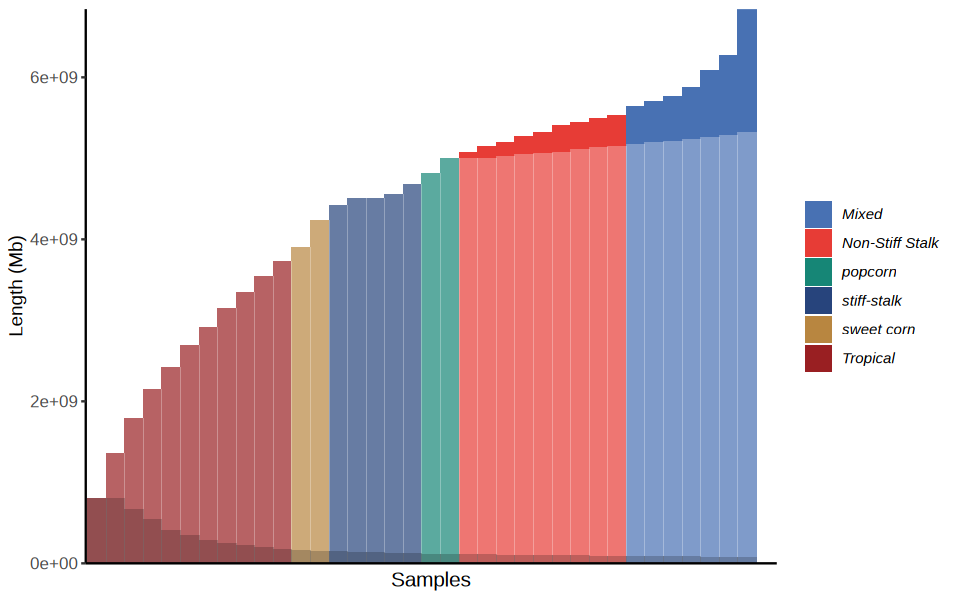

In [38]:
# 加载库
library(ggplot2)
library(dplyr)
library(stringr)

# 读取 & 处理数据
raw_data <- read.table("ID1_Chr.pangenome.gfa.ordered.tsv", sep = "\t", header = FALSE, skip = 6)
colnames(raw_data) <- c("panacus", "ordered.growth", "ordered.growth.1", "unused", "ordered.growth.3", "V6")

filtered_data <- raw_data

# 转为数值
filtered_data$ordered.growth   <- as.numeric(filtered_data$ordered.growth)
filtered_data$ordered.growth.1 <- as.numeric(filtered_data$ordered.growth.1)
filtered_data$ordered.growth.3 <- as.numeric(filtered_data$ordered.growth.3)

# 自定义顺序 & 群体配色（根据你实际的群体修改）
filtered_data$panacus <- factor(filtered_data$panacus, levels = unique(filtered_data$panacus))
filtered_data$V6 <- str_trim(filtered_data$V6)
filtered_data$V6 <- factor(filtered_data$V6)

# 自定义颜色（需要根据你的真实群体补充完整）
group_colors <- c(
  "Tropical" = "#991F22",
  "sweet corn" = "#B88640",
  "stiff-stalk" = "#27447C",
  "Non-Stiff Stalk" = "#E73C36",
  "Mixed" = "#4871B3",
  "popcorn" = "#168676"
  
)

# 绘图主体
p <- ggplot(filtered_data, aes(x = panacus, y = ordered.growth.3, fill = V6)) +
  geom_bar(stat = "identity", width = 1, alpha = 1) +
  scale_fill_manual(values = group_colors) +
  theme_classic() +
  theme(
    axis.text.x = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title.x = element_text(size = 12),
    axis.text.y = element_text(size = 10),
    legend.text = element_text(face = "italic"),
    plot.title = element_blank()
  ) +
  guides(fill = guide_legend(title = NULL)) +
  scale_y_continuous(expand = c(0, 0)) +
  labs(x = "Samples", y = "Length (Mb)")

# 添加阴影（Common 部分）
p <- p + geom_bar(data = filtered_data, aes(x = panacus, y = ordered.growth.1),
                  stat = "identity", fill = "white", alpha = 0.3, width = 1, position = "identity")

# 添加阴影（Core 部分）
p <- p + geom_bar(data = filtered_data, aes(x = panacus, y = ordered.growth),
                  stat = "identity", fill = "black", alpha = 0.2, width = 1, position = "identity")

# 设置画布大小
options(repr.plot.width = 8, repr.plot.height = 5)

# 显示图形
print(p)

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_bar()`).”


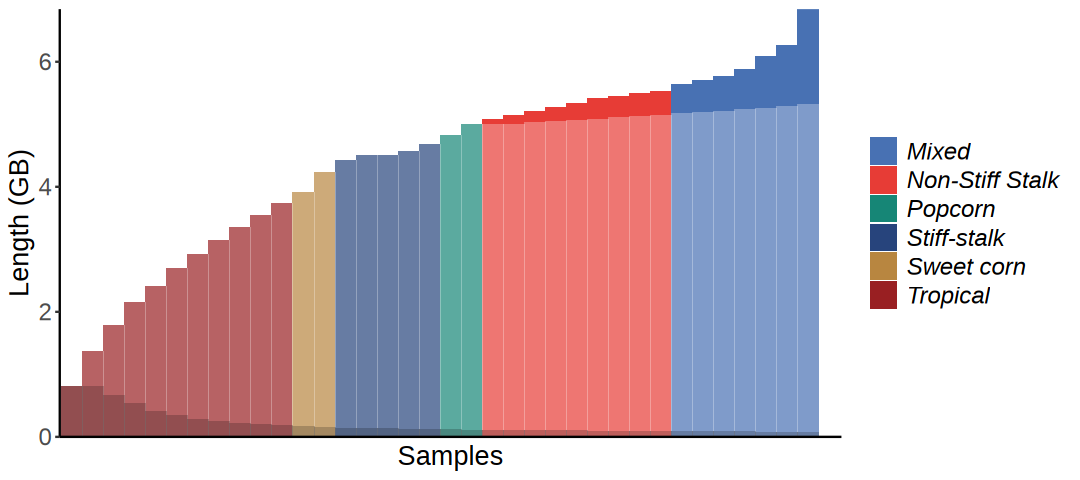

In [57]:
# 📦 加载库
library(ggplot2)
library(dplyr)
library(stringr)
library(scales)

# 📄 读取数据（跳过前6行）
raw_data <- read.table("ID1_Chr.pangenome.gfa.ordered.tsv", sep = "\t", header = FALSE, skip = 6)
colnames(raw_data) <- c("panacus", "ordered.growth", "ordered.growth.1", "unused", "ordered.growth.3", "V6")

# 数据预处理
filtered_data <- raw_data
filtered_data$ordered.growth   <- as.numeric(filtered_data$ordered.growth)
filtered_data$ordered.growth.1 <- as.numeric(filtered_data$ordered.growth.1)
filtered_data$ordered.growth.3 <- as.numeric(filtered_data$ordered.growth.3)
filtered_data$V6 <- factor(str_trim(filtered_data$V6))
filtered_data$panacus <- factor(filtered_data$panacus, levels = unique(filtered_data$panacus))

# 🎨 自定义颜色
group_colors <- c(
  "Tropical" = "#991F22",
  "Sweet corn" = "#B88640",
  "Stiff-stalk" = "#27447C",
  "Non-Stiff Stalk" = "#E73C36",
  "Mixed" = "#4871B3",
  "Popcorn" = "#168676"
)

# ✨ 绘图主体
p <- ggplot(filtered_data, aes(x = panacus, y = ordered.growth.3, fill = V6)) +
  geom_bar(stat = "identity", width = 1, alpha = 1) +
  scale_fill_manual(values = group_colors) +

  # ✅ Y轴为 GB（不带单位文字）
  scale_y_continuous(
    expand = c(0, 0),
    labels = function(x) x / 1e9
  ) +

  # ✅ 标签 + 字体大小设置
  labs(x = "Samples", y = "Length (GB)") +
  theme_classic() +
  theme(
  axis.title.x = element_text(size = 16),
  axis.title.y = element_text(size = 16),
  axis.text.y  = element_text(size = 14),
  axis.text.x  = element_blank(),
  axis.ticks.x = element_blank(),
  legend.text  = element_text(size = 14, face = "italic"),  # ✅ 斜体设置
  plot.title = element_blank()
) +
  guides(fill = guide_legend(title = NULL))

# ⚫ 添加 Common 区阴影
p <- p + geom_bar(data = filtered_data, aes(x = panacus, y = ordered.growth.1),
                  stat = "identity", fill = "white", alpha = 0.3, width = 1, position = "identity")

# ⚫ 添加 Core 区阴影
p <- p + geom_bar(data = filtered_data, aes(x = panacus, y = ordered.growth),
                  stat = "identity", fill = "black", alpha = 0.2, width = 1, position = "identity")

# ✅ 画布尺寸
options(repr.plot.width = 9, repr.plot.height = 4)

# ✅ 输出图
print(p)
ggsave("37maize_graph_pangenome_growth.pdf", plot = p, width = 9, height = 4, units = "in", dpi = 300)